In [1]:
#import packages
import pandas as pd
import numpy as np 


In [2]:
#load data
data = pd.read_csv(r'E:\AI ML\KNN assignment internship\nba_2013.csv')

In [3]:
data.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [4]:
#check for null values
data.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [5]:
#fill the null values with mean
data['fg.'].fillna(data['fg.'].mean(),inplace = True)
data['x3p.'].fillna(data['x3p.'].mean(),inplace = True)
data['ft.'].fillna(data['ft.'].mean(),inplace = True)
data['x2p.'].fillna(data['x2p.'].mean(),inplace = True)
data['efg.'].fillna(data['efg.'].mean(),inplace = True)

In [6]:
data.isnull().sum()

player          0
pos             0
age             0
bref_team_id    0
g               0
gs              0
mp              0
fg              0
fga             0
fg.             0
x3p             0
x3pa            0
x3p.            0
x2p             0
x2pa            0
x2p.            0
efg.            0
ft              0
fta             0
ft.             0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
season          0
season_end      0
dtype: int64

In [7]:
#feature extraction and target varibale
X = data.drop(['pos','bref_team_id','season','season_end','player','pts'],axis = 1)
Y = data.iloc[:,28:29]

In [8]:
X.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,53,0.660,72,144,216,28,23,26,30,122
1,20,81,20,1197,93,185,0.503,0,0,0.285111,...,136,0.581,142,190,332,43,40,57,71,203
2,27,53,12,961,143,275,0.520,0,0,0.285111,...,119,0.639,102,204,306,38,24,36,39,108
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,336,0.815,32,230,262,248,35,3,146,136
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,67,0.836,94,183,277,40,23,46,63,187


In [9]:
Y.head()

,pts
0,171
1,265
2,362
3,1330
4,328


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

In [11]:
#splitting data into training and test set
x_train, x_test, y_train, y_test = train_test_split(X , Y , test_size=0.27, random_state= 2)

In [12]:
#feature scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [13]:
#calculate r2_score for different k values (1,16)
l = []
for i in range(1,16):
    knr = KNeighborsRegressor(n_neighbors= i)
    knr.fit(x_train,y_train)
    y_pred = knr.predict(x_test)
    r2 = r2_score(y_test,y_pred)
    print('R2_score for k = ' , i , 'is:', format(r2 ,'.4f'))
    l.append(r2)

R2_score for k =  1 is: 0.9296
R2_score for k =  2 is: 0.9499
R2_score for k =  3 is: 0.9687
R2_score for k =  4 is: 0.9704
R2_score for k =  5 is: 0.9718
R2_score for k =  6 is: 0.9747
R2_score for k =  7 is: 0.9756
R2_score for k =  8 is: 0.9787
R2_score for k =  9 is: 0.9778
R2_score for k =  10 is: 0.9763
R2_score for k =  11 is: 0.9748
R2_score for k =  12 is: 0.9745
R2_score for k =  13 is: 0.9740
R2_score for k =  14 is: 0.9737
R2_score for k =  15 is: 0.9725


In [14]:
#build the model with best k value i.e k = 8 has the highest r2_score
knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print('mean squared error is :', format(mean_squared_error(y_test,pred),'.4f'))
print('r2 score is :', format(r2_score(y_test,pred),'.4f'))

mean squared error is : 4294.8369
r2 score is : 0.9787


# Plot of Best K value using r2 score

Text(0, 0.5, 'R2_score')

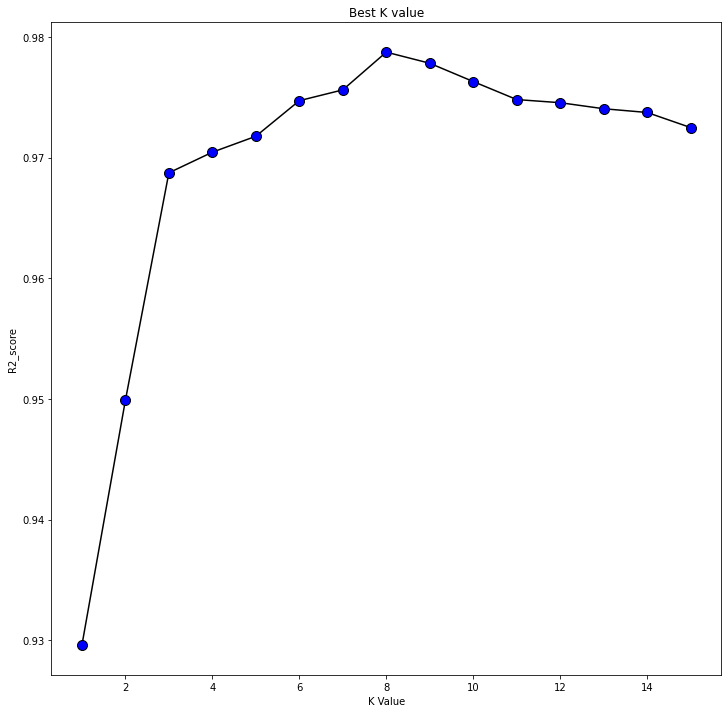

In [15]:
plt.figure(figsize=(12, 12))
plt.plot(range(1, 16), l , color='black', linestyle='solid', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Best K value')
plt.xlabel('K Value')
plt.ylabel('R2_score')

In [16]:
y_test = y_test.values.reshape(130,1)
df = pd.DataFrame({'Actual Value': y_test.flatten(), 'Predicted Value': pred.flatten()})
df

,Actual Value,Predicted Value
0,138,199.750
1,107,107.750
2,75,136.875
3,28,44.875
4,414,473.500
...,...,...
125,630,807.375
126,1134,1118.250
127,408,478.875
128,115,136.625
